In [3]:
import pandas as pd
import numpy as np
from itertools import combinations
import statistics
import math
from sklearn import metrics

# Image-based

In [72]:
# def accuracy(x,y):
#     check = list(x == y)
#     correct = check.count(True)
#     accuracy = correct/100
#     return accuracy

def TPTNFPFN(x,answer):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(answer)):
        if answer[i] == 1:
            if x[i] == 1:
                TP += 1
            elif x[i] == 0:
                FN += 1
        elif answer[i] == 0:
            if x[i] == 0:
                TN += 1
            elif x[i] == 1:
                FP += 1
#     print(f'TP is {TP}')
#     print(f'TN is {TN}')
#     print(f'FP is {FP}')
#     print(f'FN is {FN}')
    return TP, TN, FP, FN

def accuracy(x,answer):
    TP, TN, FP, FN = TPTNFPFN(x, answer)
    
    sensitivity = TP / (TP+FN)
    specificity = TN / (TN+FP)
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    
#     print(f'sensitivity {sensitivity}')
#     print(f'specificity {specificity}')
#     print(f'accuracy {accuracy}')
    
#     return TP, FP, TN, FN
    return sensitivity, specificity, accuracy

In [5]:
raters = ['R11_1', 'R14_1', 'R15_1', 'R16_1', 'R20_1', 'R21_1', 'R23_1', 'R26_1', 'R28_1', 'R29_1']

In [ ]:
11, 14, 15, 16, 20, 21, 23, 26, 28, 29


In [66]:
list(combinations(raters,3))[32]

('R11_1', 'R23_1', 'R29_1')

## Majority Vote (MV)

In [24]:
def average_accuracy(k):
    accuracies=[]
    for i in range(len(list(combinations(raters,k)))):
        selected_raters = list(combinations(raters,k))[i]
        majority_votes_df = pd.read_csv(f'./constructed/image-based_{k}_majority_votes.csv')
        ct = pd.read_csv(f'./constructed/image-based_CT.csv')
        acc = accuracy(majority_votes_df[f'{k}vote{i}'],ct['CT answer'])
        accuracies.append(acc)
#         print(f'The accuracy of {k}votes{i} is {acc}')
    #     print(f'The accuracy of {k} majority vote by {selected_raters} is {acc}')

#     average_accuracy_ = statistics.mean(accuracies)
#     sd_accuracy_ = statistics.stdev(accuracies)
#     print(f'=={k} majority votes accuracy [n = {len(list(combinations(raters,k)))}]==')
#     print(f'ㄴaverage: {average_accuracy_}')
#     print(f'ㄴstandard deviation: {sd_accuracy_}')

    return accuracies#, average_accuracy_, sd_accuracy_

In [68]:
# 0: sens, 1:spec, 2:acc
avg_acc9 = np.array(average_accuracy(9))[:,0]
avg_acc7 = np.array(average_accuracy(7))[:,0]
avg_acc5 = np.array(average_accuracy(5))[:,0]
avg_acc3 = np.array(average_accuracy(3))[:,0]
avg_acc1 = np.array(average_accuracy(1))[:,0]

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

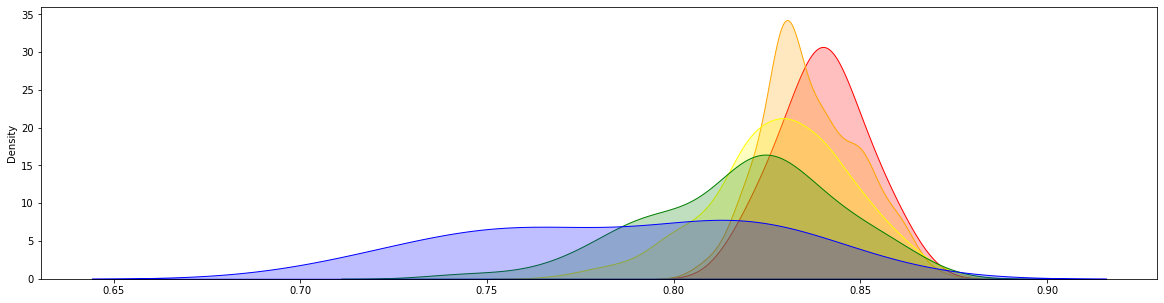

In [55]:
plt.figure(figsize=(20,5))

sns.kdeplot(data = avg_acc9, color="red", shade=True)
sns.kdeplot(data = avg_acc7, color="orange", shade=True)
sns.kdeplot(data = avg_acc5, color="yellow", shade=True)
sns.kdeplot(data = avg_acc3, color="green", shade=True)
sns.kdeplot(data = avg_acc1, color="blue", shade=True)
plt.show()

In [56]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(avg_acc7, avg_acc3,
                                equal_var=False)
print(f"t-statistics:{t_stat}, p-value: {p_val}")

t-statistics:7.043445653308522, p-value: 4.149902693445333e-11


In [70]:
# 95% CI

x = avg_acc9

m = statistics.mean(x)
s = statistics.stdev(x)

dof = len(x)

confidence = 0.95

t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

m, (m-s*t_crit/np.sqrt(dof), m+s*t_crit/np.sqrt(dof))

(0.68, (0.6637279745270019, 0.6962720254729982))

## Individual

In [73]:
average_accuracy(1)

[(35, 4, 46, 15),
 (35, 8, 42, 15),
 (35, 4, 46, 15),
 (24, 0, 50, 26),
 (35, 3, 47, 15),
 (26, 0, 50, 24),
 (26, 0, 50, 24),
 (35, 13, 37, 15),
 (34, 0, 50, 16),
 (35, 3, 47, 15)]

In [629]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
indiv_answer = pd.read_csv(f'./constructed/image-based_1_majority_votes.csv')['1vote4']
TPTNFPFN(indiv_answer,ct_answer)
print(f'accuracy: {accuracy(indiv_answer,ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(indiv_answer, ct_answer)}')

accuracy: (0.7, 0.94, 0.82)
cohen kappa: 0.64


## MV

In [76]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mv_answer = pd.read_csv(f'./constructed/image-based_3_majority_votes.csv')['3vote6']
TPTNFPFN(mv_answer,ct_answer)
print(f'accuracy: {accuracy(mv_answer,ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(mv_answer, ct_answer)}')

accuracy: (34, 2, 48, 16)
cohen kappa: 0.64


In [386]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mv_answer = pd.read_csv(f'./constructed/image-based_3_majority_votes.csv')

In [397]:
accuracy(mv_answer['3vote0'],ct_answer)

(0.76, 0.94, 0.85)

In [727]:
list(combinations(raters,7))[7]

('R11', 'R14', 'R15', 'R16', 'R20', 'R26', 'R28')

In [77]:
k = 9
eps = 0.0001

ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mv_answer = pd.read_csv(f'./constructed/image-based_{k}_majority_votes.csv')

for i in range(len(list(combinations(raters,k)))):
    scores = accuracy(mv_answer[f'{k}vote{i}'], ct_answer)
    
    if 0.6637-eps<scores[0]<0.6963+eps:
        if 1-eps<scores[1]<1+eps:
            if 0.8319-eps<scores[2]<0.8481+eps:
                print("============",i,"===========")
                print(scores[0])
                print(scores[1])
                print(scores[2])

## Consensus

In [78]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
cons_answer = pd.read_csv(f'./constructed/image-based_consensus2.csv')['Answer']
TPTNFPFN(cons_answer,ct_answer)
print(f'accuracy: {accuracy(cons_answer, ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(cons_answer, ct_answer)}')

accuracy: (31, 0, 50, 19)
cohen kappa: 0.62


In [79]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
cons_answer = pd.read_csv(f'./constructed/image-based_consensus3.csv')['Answer']
TPTNFPFN(cons_answer,ct_answer)
print(f'accuracy: {accuracy(cons_answer,ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(cons_answer, ct_answer)}')

accuracy: (30, 1, 49, 20)
cohen kappa: 0.5800000000000001


### LCA

In [80]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
lca_answer = pd.read_csv(f'./constructed/image-based_lca_2.csv')['Answer']
TPTNFPFN(lca_answer,ct_answer)
print(f'accuracy: {accuracy(lca_answer,ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(lca_answer, ct_answer)}')

accuracy: (36, 0, 50, 14)
cohen kappa: 0.72


In [81]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
lca_answer = pd.read_csv(f'./constructed/image-based_lca_3.csv')['Answer']
TPTNFPFN(lca_answer,ct_answer)
print(f'accuracy: {accuracy(lca_answer,ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(lca_answer, ct_answer)}')

accuracy: (37, 0, 50, 13)
cohen kappa: 0.74


### MV-LCA

In [637]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mvlca_answer = pd.read_csv(f'./constructed/image-based_mvlca_2.csv')['Answer']
TPTNFPFN(mvlca_answer,ct_answer)
print(f'accuracy: {accuracy(mvlca_answer,ct_answer,)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(mvlca_answer, ct_answer)}')

accuracy: (0.72, 1.0, 0.86)
cohen kappa: 0.72


In [638]:
ct_answer = pd.read_csv(f'./constructed/image-based_CT.csv')['CT answer']
mvlca_answer = pd.read_csv(f'./constructed/image-based_mvlca_3.csv')['Answer']
TPTNFPFN(mvlca_answer,ct_answer)
print(f'accuracy: {accuracy(mvlca_answer,ct_answer)}')
print(f'cohen kappa: {metrics.cohen_kappa_score(mvlca_answer, ct_answer)}')

accuracy: (0.72, 1.0, 0.86)
cohen kappa: 0.72


# Lesion-based

In [642]:
# 1    2    3    4    5    6    7    8    9    10
# R11, R14, R15, R16, R20, R21, R23, R26, R28, R29

raters = ['R11', 'R14', 'R15', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28', 'R29']

In [643]:
lesion_df = pd.read_csv('./Lesion_based_data/lesion_df.csv').reset_index()

In [644]:
def str2arr(strg):
    if strg in [0,'0']:
        return 0

    coors = strg[1:-1].split(' ')
    while '' in coors:
        coors.remove('')
    coors = np.array(coors).astype(float)
    return coors

str2arr(list(lesion_df['avg_mask'])[1])

array([1691.67,  976.44, 1933.33, 1204.22])

In [645]:
# herbwood.tistory.com/3?category=867198
# Boolean function for intersection

def boxesIntersect(boxA, boxB):
    if type(boxA) == str:
        boxA = str2arr(boxA)
    if type(boxB) == str:
        boxB = str2arr(boxB)
    
    if type(boxA) == int:
        if type(boxB) == int: # TN
            return 'TN'
        else: # FP
            return 'FP'
        
    elif type(boxB) == int: # FN
        return 'FN'
    
    else: # TP 일수도 아닐 수도 (겹치면 True, 안겹치면 False)
        boxA = boxA.astype(float)
        boxB = boxB.astype(float)

        if boxA[0] > boxB[2]:
            return 'FP' # boxA is on the right of boxB
        if boxB[0] > boxA[2]:
            return 'FP' # boxA is on the left of boxB
        if boxA[3] < boxB[1]:
            return 'FP' # boxA is above boxB
        if boxA[1] > boxB[3]:
            return 'FP' # boxA is below boxB
        return True

In [646]:
def iou(A,B):  
    if boxesIntersect(A, B) != True:
        return 0
    
    if type(A) == str:
        A = str2arr(A)
    if type(B) == str:
        B = str2arr(B)
    
    A = A.astype(float)
    B = B.astype(float)
    
    # A = (x1, y1, x2, y2)
    A_area = (A[2] - A[0] + 1) * (A[3] - A[1] + 1)
    B_area = (B[2] - B[0] + 1) * (B[3] - B[1] + 1)

    # find intersection box
    x1 = max(A[0], B[0])
    y1 = max(A[1], B[1])
    x2 = min(A[2], B[2])
    y2 = min(A[3], B[3])

    # compute the width and height of the intersection
    w = max(0, x2 - x1 + 1)
    h = max(0, y2 - y1 + 1)

    inter = w * h
    iou_ = inter / (A_area + B_area - inter)

    return iou_

In [647]:
def check_box_in_list(box, boxlist, thres):
    for boxx in boxlist:
        if type(str2arr(boxx)) != int:
            box2 = str2arr(box)
            boxx = str2arr(boxx)

            box2 = box2.astype(float)
            boxx = boxx.astype(float)

            if box2[0] > boxx[2]:
                continue # boxA is on the right of boxB
            if boxx[0] > box2[2]:
                continue # boxA is on the left of boxB
            if box2[3] < boxx[1]:
                continue # boxA is above boxB
            if box2[1] > boxx[3]:
                continue # boxA is below boxB
            if iou(box2, boxx)>thres:
                return True
    return False

def marking(silver,thres):
    result = []

    for caseId in range(1,101):
#         print(f'===========Case {caseId}=========')
        ct_ans = list(ct_answer[ct_answer['DB_PatientId']==caseId]['mask'])[0]
        silver_ans = list(silver[silver['DB_PatientId']==caseId]['mask'])
        for i in range(len(silver_ans)):
#             print(ct_ans, silver_ans[i])
#             print(boxesIntersect(ct_ans, silver_ans[i]))
            if boxesIntersect(ct_ans, silver_ans[i]) == True:
#                 print(iou(ct_ans, silver_ans[i]))
                if iou(ct_ans, silver_ans[i])>thres:
#                     print('TP')
                    result.append('TP')
                else:
#                     print('FP')
                    result.append('FP')
            else:
                result.append(boxesIntersect(ct_ans, silver_ans[i]))
        if type(str2arr(ct_ans)) != int:
            if not check_box_in_list(ct_ans, silver_ans, thres):
                result.append('FN')
    return result

In [648]:
# def f1score(silver, thres, prnt=True):
#     result = marking(silver, thres)

#     TP = result.count('TP')
#     FP = result.count('FP')
#     TN = result.count('TN')
#     FN = result.count('FN')

#     precision = TP / (TP+FP)
#     recall = TP / (TP+FN)

#     f1 = 2 * (precision * recall)/(precision+recall)
    
#     if prnt:
#         print(f'TP {TP}')
#         print(f'FP {FP}')
#         print(f'TN {TN}')
#         print(f'FN {FN}')
#         print(f'precision {precision}')
#         print(f'recall {recall}')
#         print(f'f1-score {f1}')

#     return precision, recall, f1

In [649]:
def accuracies(silver, thres, prnt=True):
    result = marking(silver, thres)

    TP = result.count('TP')
    FP = result.count('FP')
    TN = result.count('TN')
    FN = result.count('FN')

    sensitivity = TP / (TP+FN)
    specificity = TN / (TN+FP)
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    
    if prnt:
        print(f'TP {TP}')
        print(f'FP {FP}')
        print(f'TN {TN}')
        print(f'FN {FN}')
        print(f'sensitivity {sensitivity}')
        print(f'specificity {specificity}')
        print(f'accuracy {accuracy}')

    return sensitivity, specificity, accuracy

In [650]:
ct_answer = pd.read_csv('./constructed/lesion-based_CT.csv')
ct_answer.head()

,DB_PatientId,mask
0,1,[1657 929 1977 1218]
1,2,0
2,3,0
3,4,0
4,5,[1253 1479 1786 2023]


In [651]:
THRES = 0.1

## Individual (R20)

In [554]:
prec = []
rec = []
f1s = []
sens = []
spec = []
acc = []

for rater in raters:
    silvergt = pd.read_csv(f'./constructed/lesion-based_{rater}.csv')
    silvergt = silvergt[['DB_PatientId','mask']]
    silvergt = silvergt.reset_index(drop=True)
#     print(f'{rater} f1score: {f1score(silvergt,THRES)}')
    print(f'==========={rater}==============')
#     scores = f1score(silvergt, THRES)
    accs = accuracies(silvergt, THRES)
#     prec.append(scores[0])
#     rec.append(scores[1])
#     f1s.append(scores[2])
    sens.append(accs[0])
    spec.append(accs[1])
    acc.append(accs[2])

===========R11==============
TP 30
FP 10
TN 46
FN 36
sensitivity 0.45454545454545453
specificity 0.8214285714285714
accuracy 0.6229508196721312
===========R14==============
TP 28
FP 15
TN 42
FN 37
sensitivity 0.4307692307692308
specificity 0.7368421052631579
accuracy 0.5737704918032787
===========R15==============
TP 31
FP 8
TN 46
FN 34
sensitivity 0.47692307692307695
specificity 0.8518518518518519
accuracy 0.6470588235294118
===========R16==============
TP 24
FP 1
TN 50
FN 52
sensitivity 0.3157894736842105
specificity 0.9803921568627451
accuracy 0.5826771653543307
===========R20==============
TP 33
FP 8
TN 47
FN 31
sensitivity 0.515625
specificity 0.8545454545454545
accuracy 0.6722689075630253
===========R21==============
TP 24
FP 3
TN 50
FN 50
sensitivity 0.32432432432432434
specificity 0.9433962264150944
accuracy 0.5826771653543307
===========R23==============
TP 25
FP 6
TN 50
FN 49
sensitivity 0.33783783783783783
specificity 0.8928571428571429
accuracy 0.5769230769230769
==========

In [561]:
statistics.mean(acc), statistics.stdev(spec)

(0.6016954854916785, 0.12140651976974258)

In [562]:
# 95% CI

x = acc

m = statistics.mean(x)
s = statistics.stdev(x)

dof = len(x)

confidence = 0.95

t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

(m-s*t_crit/np.sqrt(dof), m+s*t_crit/np.sqrt(dof))

(0.5636916506168955, 0.6396993203664615)

In [435]:
silvergt = pd.read_csv('./constructed/lesion-based_R20.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 23
FP 18
TN 47
FN 14
precision 0.5609756097560976
recall 0.6216216216216216
f1-score 0.5897435897435899


(0.5609756097560976, 0.6216216216216216, 0.5897435897435899)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

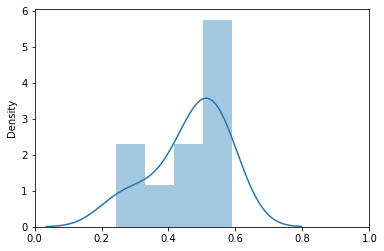

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(f1s)
plt.xlim(0, 1)
# plt.title('3 majority votes [n=120]')

## MV

In [563]:
k = 9
i = 0 # len(list(combinations(raters,k)))

In [564]:
len(list(combinations(raters,k))), list(combinations(raters,k))[i]

(10, ('R11', 'R14', 'R15', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28'))

In [565]:
silvergt = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
silvergt = silvergt[silvergt[f'{k}vote{i}']==1][['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
accuracies(silvergt,THRES)

TP 30
FP 1
TN 50
FN 36
sensitivity 0.45454545454545453
specificity 0.9803921568627451
accuracy 0.6837606837606838


(0.45454545454545453, 0.9803921568627451, 0.6837606837606838)

In [28]:
omit_lst = list(set(range(1,101))-set(silvergt['DB_PatientId']))
omit_lst

[64, 49, 73]

### MV average scores

In [567]:
def average_score(k, score):
    if score == 'precision': idx = 0
    elif score == 'recall': idx = 1
    elif score == 'f1': idx = 2
        
    scores=[]
    for i in range(len(list(combinations(raters,k)))):
        selected_raters = list(combinations(raters,k))[i]
        majority_votes_df = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
        majority_votes_df = majority_votes_df[majority_votes_df[f'{k}vote{i}']==1][['DB_PatientId','mask']]
        majority_votes_df = majority_votes_df.reset_index(drop=True)
        scores.append(accuracies(majority_votes_df,THRES,prnt=False)[idx])

    average_score_ = statistics.mean(scores)
    sd_score_ = statistics.stdev(scores)
    print(f'=={k} majority votes f1-score [n = {len(list(combinations(raters,k)))}]==')
    print(f'ㄴaverage: {average_score_}')
    print(f'ㄴstandard deviation: {sd_score_}')

    return scores, average_score_, sd_score_

In [568]:
def average_accuracies(k, score):
    if score == 'sensitivity': idx = 0
    elif score == 'specificity': idx = 1
    elif score == 'accuracy': idx = 2
        
    scores=[]
    for i in range(len(list(combinations(raters,k)))):
        selected_raters = list(combinations(raters,k))[i]
        majority_votes_df = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
        majority_votes_df = majority_votes_df[majority_votes_df[f'{k}vote{i}']==1][['DB_PatientId','mask']]
        majority_votes_df = majority_votes_df.reset_index(drop=True)
        scores.append(accuracies(majority_votes_df,THRES,prnt=False)[idx])

    average_score_ = statistics.mean(scores)
    sd_score_ = statistics.stdev(scores)
    print(f'=={k} majority votes accuracies [n = {len(list(combinations(raters,k)))}]==')
    print(f'ㄴaverage: {average_score_}')
    print(f'ㄴstandard deviation: {sd_score_}')

    return scores, average_score_, sd_score_


In [ ]:
avg_precision_9 = average_score(9,'precision')[0]
avg_precision_7 = average_score(7,'precision')[0]
avg_precision_5 = average_score(5,'precision')[0]
avg_precision_3 = average_score(3,'precision')[0]

avg_recall_9 = average_score(9,'recall')[0]
avg_recall_7 = average_score(7,'recall')[0]
avg_recall_5 = average_score(5,'recall')[0]
avg_recall_3 = average_score(3,'recall')[0]

avg_f1_9 = average_score(9,'f1')[0]
avg_f1_7 = average_score(7,'f1')[0]
avg_f1_5 = average_score(5,'f1')[0]
avg_f1_3 = average_score(3,'f1')[0]

In [569]:
avg_sensitivity_9 = average_accuracies(9,'sensitivity')[0]
avg_sensitivity_7 = average_accuracies(7,'sensitivity')[0]
avg_sensitivity_5 = average_accuracies(5,'sensitivity')[0]
avg_sensitivity_3 = average_accuracies(3,'sensitivity')[0]

avg_specificity_9 = average_accuracies(9,'specificity')[0]
avg_specificity_7 = average_accuracies(7,'specificity')[0]
avg_specificity_5 = average_accuracies(5,'specificity')[0]
avg_specificity_3 = average_accuracies(3,'specificity')[0]

avg_accuracy_9 = average_accuracies(9,'accuracy')[0]
avg_accuracy_7 = average_accuracies(7,'accuracy')[0]
avg_accuracy_5 = average_accuracies(5,'accuracy')[0]
avg_accuracy_3 = average_accuracies(3,'accuracy')[0]

==9 majority votes accuracies [n = 10]==
ㄴaverage: 0.4547166842156965
ㄴstandard deviation: 0.012680694695553213
==7 majority votes accuracies [n = 120]==
ㄴaverage: 0.4513126049151942
ㄴstandard deviation: 0.02776310773973007
==5 majority votes accuracies [n = 252]==
ㄴaverage: 0.4414460552389767
ㄴstandard deviation: 0.03854583948616776
==3 majority votes accuracies [n = 120]==
ㄴaverage: 0.4328259583592971
ㄴstandard deviation: 0.05105601800607159
==9 majority votes accuracies [n = 10]==
ㄴaverage: 0.9803921568627451
ㄴstandard deviation: 0.0
==7 majority votes accuracies [n = 120]==
ㄴaverage: 0.9805115635997989
ㄴstandard deviation: 0.0108685602014233
==5 majority votes accuracies [n = 252]==
ㄴaverage: 0.9772343080342695
ㄴstandard deviation: 0.015017066752742553
==3 majority votes accuracies [n = 120]==
ㄴaverage: 0.9618690307655611
ㄴstandard deviation: 0.02872296590971808
==9 majority votes accuracies [n = 10]==
ㄴaverage: 0.6838352478120207
ㄴstandard deviation: 0.009165359415926947
==7 major

In [719]:
eps = 0.002

for i in range(len(avg_sensitivity_3)):
    if 0.4328-eps<avg_sensitivity_3[i]<0.4328+eps:
        if 0.9619-eps<avg_specificity_3[i]<0.9619+eps:
            if 0.6606-eps<avg_accuracy_3[i]<0.6606+eps:
                print("============",i,"===========")
                print(avg_sensitivity_3[i])
                print(avg_specificity_3[i])
                print(avg_accuracy_3[i])

============ 32 ===========
0.43478260869565216
0.9615384615384616
0.6611570247933884


In [720]:
eps = 0.0001

for i in range(len(avg_sensitivity_3)):
    if 0.4236-eps<avg_sensitivity_3[i]<0.4420+eps:
        if 0.9567-eps<avg_specificity_3[i]<0.9671+eps:
            if 0.6547-eps<avg_accuracy_3[i]<0.6665+eps:
                print("============",i,"===========")
                print(avg_sensitivity_3[i])
                print(avg_specificity_3[i])
                print(avg_accuracy_3[i])

============ 32 ===========
0.43478260869565216
0.9615384615384616
0.6611570247933884


In [57]:
from scipy import stats

In [641]:
# 95% CI

x = avg_specificity_9

m = statistics.mean(x)
s = statistics.stdev(x)

dof = len(x)

confidence = 0.95

t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

(m-s*t_crit/np.sqrt(dof), m+s*t_crit/np.sqrt(dof))

(0.9803921568627451, 0.9803921568627451)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [585]:
avg_specificity_9

[0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451,
 0.9803921568627451]

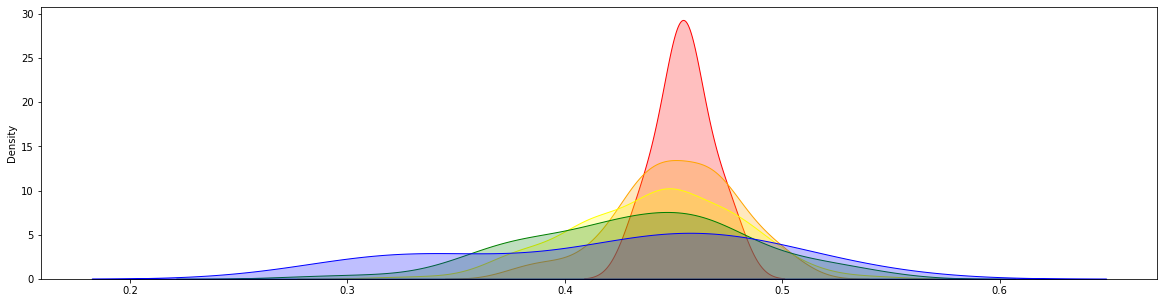

In [588]:
plt.figure(figsize=(20,5))

sns.kdeplot(data = avg_sensitivity_9, color="red", shade=True)
sns.kdeplot(data = avg_sensitivity_7, color="orange", shade=True)
sns.kdeplot(data = avg_sensitivity_5, color="yellow", shade=True)
sns.kdeplot(data = avg_sensitivity_3, color="green", shade=True)
sns.kdeplot(data = sens, color="blue", shade=True) # prec, rec, f1
plt.show()

In [620]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(avg_accuracy_3, avg_accuracy_5,
                                equal_var=False)
print(f"t-statistics:{t_stat}, p-value: {p_val}")

t-statistics:-3.6853506052044467, p-value: 0.00029978189400760405


## Consensus

In [652]:
silvergt = pd.read_csv('./constructed/lesion-based_consensus2.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)
accuracies(silvergt,THRES)

TP 27
FP 5
TN 50
FN 42
precision 0.84375
recall 0.391304347826087
f1-score 0.5346534653465347
TP 27
FP 5
TN 50
FN 42
sensitivity 0.391304347826087
specificity 0.9090909090909091
accuracy 0.6209677419354839


(0.391304347826087, 0.9090909090909091, 0.6209677419354839)

In [653]:
silvergt = pd.read_csv('./constructed/lesion-based_consensus3.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)
accuracies(silvergt, THRES)

TP 30
FP 1
TN 49
FN 40
precision 0.967741935483871
recall 0.42857142857142855
f1-score 0.594059405940594
TP 30
FP 1
TN 49
FN 40
sensitivity 0.42857142857142855
specificity 0.98
accuracy 0.6583333333333333


(0.42857142857142855, 0.98, 0.6583333333333333)

## LCA

In [654]:
silvergt = pd.read_csv('./constructed/lesion-based_lca_2.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)
accuracies(silvergt, THRES)

TP 29
FP 1
TN 50
FN 35
precision 0.9666666666666667
recall 0.453125
f1-score 0.6170212765957447
TP 29
FP 1
TN 50
FN 35
sensitivity 0.453125
specificity 0.9803921568627451
accuracy 0.6869565217391305


(0.453125, 0.9803921568627451, 0.6869565217391305)

In [181]:
silvergt = pd.read_csv('./constructed/lesion-based_lca_3.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)
accuracies(silvergt, THRES)

TP 24
FP 9
TN 50
FN 18
precision 0.7272727272727273
recall 0.5714285714285714
f1-score 0.64
TP 24
FP 9
TN 50
FN 18
sensitivity 0.5714285714285714
specificity 0.847457627118644
accuracy 0.7326732673267327


(0.5714285714285714, 0.847457627118644, 0.7326732673267327)

In [ ]:
# Target journal
IF >10
(25) Lancet digital health
(11 ->20?) Radiology v
(12) NPJ digital medicine (do as ai says)